In [1]:
#y=w0+w2x2+w3x3

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression

In [3]:
#creat sample data
X=np.array([1,3,5,8,11,14,17,20]).reshape(-1,1) #age
y=np.array([10,15,22,35,50,65,72,75]) #weight

In [4]:
#Step -1 function to plot an degree
def plot_polynomial(degree,color,label,):
    poly=PolynomialFeatures(degree=degree,include_bias=False)
    X_poly= poly.fit_transform(X)
    #Train Model 
    
    model =LinearRegression()
    model.fit(X_poly,y)

    
    #predict curve
    X_smooth =np.linspace(0,25,200).reshape(-1,1)
    X_smooth_poly= poly.transform(X_smooth)
    y_smooth =model.predict(X_smooth_poly)

    plt.plot(X_smooth,y_smooth,color=color,linewidth=3,label=label)
    #print equation 
    coeffs =model.coef_
    intercept=model.intercept_
    print(f"\n{label} Equation")
    eq=f"y={intercept}"
    for i,c in enumerate(coeffs):
        eq+f"{c:.3f}*x^{i+1}"
    print(eq)

    return model,poly
    



Linear Degree 1 Equation
y=5.55175067333591

Linear Degree 2 Equation
y=1.4443262359693279

Cubic Equation
y=9.182178257912753


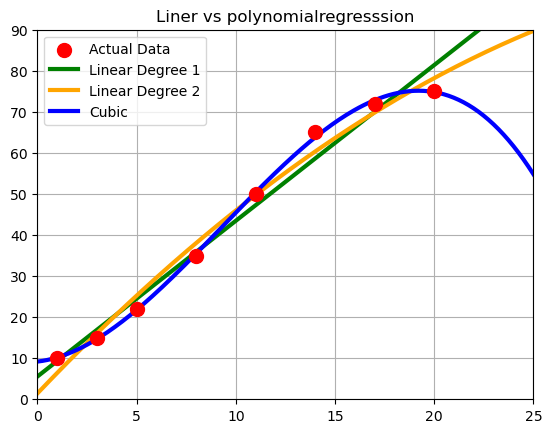

In [5]:
#plot 
plt.scatter(X,y,color='red',s=100,label='Actual Data',zorder=5)
plot_polynomial(1,'green','Linear Degree 1')
plot_polynomial(2,'orange','Linear Degree 2')
#Quadratic
model_cubic,plot_cubic =plot_polynomial(3,'blue','Cubic')
plt.title('Liner vs polynomialregresssion')
plt.legend()
plt.grid()
plt.ylim(0,90)
plt.xlim(0,25)
plt.show()


In [6]:
#predict weight fpr age 25 uing cu model (best fir model)###############Regulation_Ridge-lasso.
age_25=plot_cubic.transform(np.array([[25]]))
weight_25 =model_cubic.predict(age_25)
print(f"\nPredicted wegiht for age 25 is:{weight_25[0]:2f}")


Predicted wegiht for age 25 is:54.778399


In [12]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_squared_error,r2_score



In [18]:
X,y =make_regression(n_samples=500,n_features =10,noise=15,random_state=42)
print(X.shape,y.shape)
print(X)

(500, 10) (500,)
[[ 1.02406253  2.06150358  2.55819929 ...  2.00609289  0.59252695
   0.1845513 ]
 [-0.63773998  0.28916864  0.67481949 ...  0.49245126 -0.53099696
   0.38240975]
 [ 0.779349   -0.84685097  0.75749515 ... -0.98787334 -0.03901952
   0.6952029 ]
 ...
 [-1.55375877  0.67048062  0.30047436 ... -0.07576429  0.81788966
  -1.13883312]
 [ 0.09806754 -0.17556395  0.35845362 ...  1.84860883  1.29587178
   0.75792185]
 [ 0.62206999  1.08176673 -0.24408047 ...  1.43136678  1.32893332
  -0.13449678]]


In [26]:
#TRAIN TET SPLIT
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2, random_state=42)


In [27]:
# Ridge regresssion
ridge_model =Ridge(alpha=1.0)
ridge_model.fit(X_train,y_train)
y_pred_ridge=ridge_model.predict(X_test)
print("Ridge Regression :",y_pred_ridge)

Ridge Regression : [-2.45204059e+01 -5.29735183e+01  1.76677610e+02  6.41022494e+01
  1.30674444e+01 -2.12459949e+02 -1.77393637e+01  7.64201882e+01
  3.76414329e+01 -2.66668895e+02  8.36249155e+01  3.74118922e+01
  8.41489897e+01  1.99756868e+02  7.83686685e+01  8.20929983e+01
  1.71974870e+01 -8.75898763e+01 -1.59781431e+02  2.41256770e-01
 -1.93164755e+02 -2.52237144e+02 -2.97463720e+01 -6.29663252e+01
  1.02641884e+02 -6.30115256e+01 -7.80667051e+01  9.27394206e+01
  1.43556981e+02  2.05222970e+01 -2.60210953e+02 -1.07720055e+02
  8.77922416e+01  9.75182535e+00  1.06426615e+02 -2.33879226e+02
 -1.24134388e+02  7.39355190e+01  9.25403587e+01 -3.71034659e+02
 -2.34904684e+02  2.47806352e+02  1.87163710e+02 -9.51321772e+01
 -1.43477201e+02  4.00884368e+01  4.60675344e+02  6.36469693e+01
 -2.38726526e+01 -1.66818538e+02  1.76097303e+02 -1.32110588e+02
  6.27648748e+01  1.64250694e+02  1.25359491e+01 -7.98531656e+01
 -1.37246194e+02 -1.47211026e+02 -1.80266978e+02 -1.23655880e+02
 -9.12

In [28]:
#find the mean squared error and r2 score
mse_ridge=mean_squared_error(y_test,y_pred_ridge)
r2_ridge =r2_score(y_test,y_pred_ridge)
print(f"ridge Regression -MSE:{mse_ridge},R2: {r2_ridge}")


ridge Regression -MSE:218.61380229588318,R2: 0.9889237403143353


In [35]:
#Lasso Regression
lasso_model =Lasso(alpha=0.1)
lasso_model.fit(X_train,y_train)
y_pred_lasso =lasso_model.predict(X_test)
#find the mena squared error and r2 score
mse_lasso =mean_squared_error (y_test,y_pred_lasso)
r2_lasso =r2_score(y_test,y_pred_lasso)
print(f"lasso Regression MSE :{mse_ridge},R2:{r2_lasso}")


lasso Regression MSE :218.61380229588318,R2:0.9889276375260497


In [ ]:
#ElasticRegression 
rlastic_model = ElasticNet9alpha=0.5,11_ration=0.5)
elastic_model.fit(X_train,y_train)
y_pred_elas

In [37]:
#Elastic Regression
elastic_model =ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_model.fit(X_train,y_train)
y_pred_elastic =lasso_model.predict(X_test)
#find the mena squared error and r2 score
mse_elastic =mean_squared_error (y_test,y_pred_elastic)
r2_elastic =r2_score(y_test,y_pred_elastic)
print(f"ElasticNet Regression MSE :{mse_elastic},R2:{r2_elastic}")

ElasticNet Regression MSE :218.53688244248264,R2:0.9889276375260497
